In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture as GMM

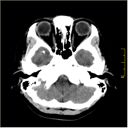

In [2]:
from PIL import Image
image = Image.open("./data/prueba4.BMP")

# reduce the resolution
image = image.resize((128, 128))
display(image)
image_array = np.array(image)

In [3]:
# Reshape the image array to a 2D array of shape (num_pixels, num_channels)
num_pixels = image_array.shape[0] * image_array.shape[1]
num_channels = image_array.shape[2]
pixels_2d = image_array.reshape(num_pixels, num_channels)
print(pixels_2d.shape)
print(pixels_2d)


(16384, 3)
[[101  99  89]
 [ 63  62  56]
 [ 63  62  56]
 ...
 [175 174 166]
 [175 174 165]
 [226 225 216]]


In [48]:
# %%timeit
gmm = GMM(n_components=4, init_params='kmeans', covariance_type='spherical', random_state=0, verbose=2, verbose_interval=1)
gmm

GaussianMixture(covariance_type='spherical', n_components=4, random_state=0,
                verbose=2, verbose_interval=1)

In [49]:
labels = gmm.fit_predict(pixels_2d)
print(np.unique(labels))

Initialization 0
  Iteration 1	 time lapse 0.06903s	 ll change inf
  Iteration 2	 time lapse 0.00801s	 ll change 1.31382
  Iteration 3	 time lapse 0.01001s	 ll change 1.58837
  Iteration 4	 time lapse 0.01200s	 ll change 1.79620
  Iteration 5	 time lapse 0.01399s	 ll change 2.28668
  Iteration 6	 time lapse 0.00999s	 ll change 7.49663
  Iteration 7	 time lapse 0.01400s	 ll change 0.30847
  Iteration 8	 time lapse 0.01100s	 ll change 0.50550
  Iteration 9	 time lapse 0.00901s	 ll change 2.07492
  Iteration 10	 time lapse 0.01915s	 ll change 0.00298
  Iteration 11	 time lapse 0.01801s	 ll change 0.00205
  Iteration 12	 time lapse 0.02300s	 ll change 0.00166
  Iteration 13	 time lapse 0.01099s	 ll change 0.00125
  Iteration 14	 time lapse 0.01200s	 ll change 0.00090
Initialization converged: True	 time lapse 0.24018s	 ll 5.44313
[0 1 2 3]


In [50]:
gmm.score(pixels_2d)

19725646191.359848

In [51]:
np.array(gmm.predict_proba([pixels_2d[260]]), dtype=np.float32)

array([[4.5042973e-16, 0.0000000e+00, 1.0000000e+00, 2.0237900e-22]],
      dtype=float32)

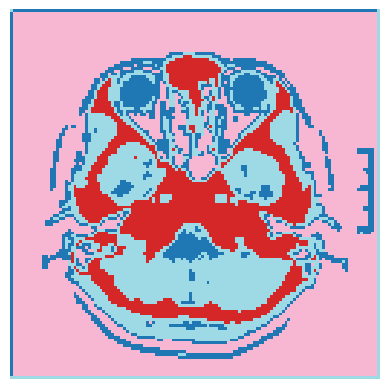

In [52]:
import matplotlib.pyplot as plt
# Reshape the labels to match the original image dimensions
clustered_labels = labels.reshape(image_array.shape[0], image_array.shape[1])

# Visualize the clustered image
plt.imshow(clustered_labels, cmap='tab20', interpolation='nearest')
plt.axis('off')
plt.show()